# CUSTOMER SEGMENTATION

<i>Understanding consumer behavior is essential for a company.</i><br> 
<i>Every customer has a different thought process and attitude towards buying a particular product, therefore customer segmentation it´s necessary.</i>

**What is the importance of customer segmentation?**
- Understanding who your most valuable customers are and why
- Retention of Consumers
- Improve Customer Service 
- Customer Differentiation
- Creating targeted campaigns and ads to resonate with and convert segments of customers
- Identifying new opportunities for products, support, and service efficiently

**Customer Segmentation by Country**<br> 
- <i>UK market represents 86% of our Total Sales and 90% of our customers </i>.<br> 
- Geographic segmentation- grouping customers with regards to their physical location.
 

In [223]:
import numpy as np
import pandas as pd

import math
import datetime as dt

#visualizations 
import missingno as msno
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#predictive models
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale, StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [224]:
retail = pd.read_csv('OnlineRetail.csv', encoding='latin-1')
retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Data Insight

In [225]:
retail.shape

(541909, 8)

Missing data

Fields " description", "CustomerID" have missing values. 

In [226]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

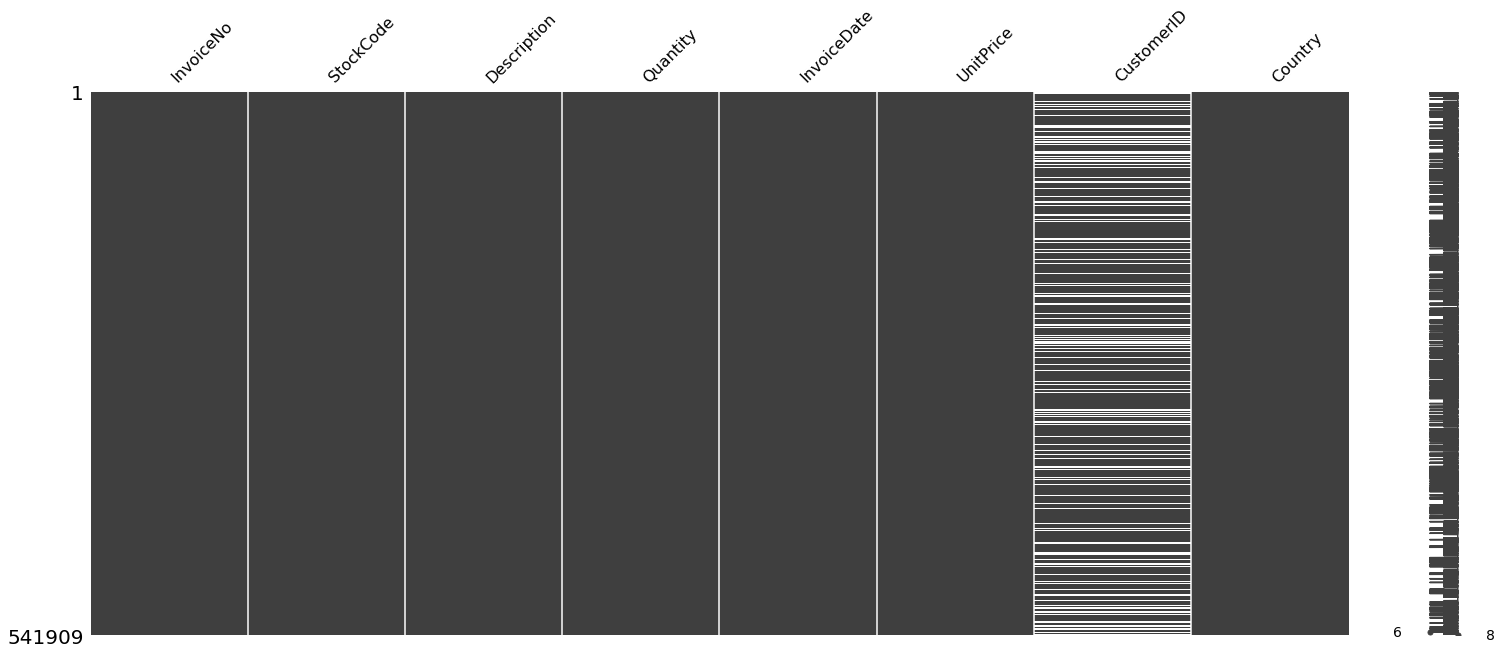

In [227]:
msno.matrix(retail)

"Total Revenue"column creation that calculates total price for each line of order. 

In [228]:
retail["TotalRevenue"] = retail["Quantity"]* retail["UnitPrice"]
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


**UK CUSTOMERS**

In [229]:
uk = retail[retail['Country']=='United Kingdom']
uk.shape

(495478, 9)

**How many customers do we have? UK?** 

In [230]:
customers = retail["CustomerID"].nunique()
uk_customers = uk["CustomerID"].nunique()
print("Total Customers:", customers)
print("Total Customers in UK:", uk_customers)
print('Percentage of Customers in UK : {}/{} ({:.2f}%) '.format(customers,uk_customers, uk_customers/customers*100))

Total Customers: 4372
Total Customers in UK: 3950
Percentage of Customers in UK : 4372/3950 (90.35%) 


**Remove missing Customer IDs**

In [231]:
uk.dropna(subset=['CustomerID'],how='all',inplace=True)
uk.shape

(361878, 9)

**Remove negative/0 quantities and prices**

In [232]:
uk = uk[uk['Quantity']>0]
uk = uk[uk['UnitPrice']>0]
uk.shape

(354321, 9)

In [233]:
uk.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
TotalRevenue    0
dtype: int64

# RFM Analysis

RFM (recency, frequency, monetary) analysis is a simple statistical method for categorising customers based on their purchasing behaviour.<br> It´s used to determine quantitatively which customers are  the best ones by examining:<br> <u>how recently a customer has purchased</u> (recency), <u>how often they purchase</u> (frequency), and <u>how much the customer spends</u> (monetary).

- **RECENCY** (R): Days since last purchase<br> 
- **FREQUENCY** (F): Total number of purchases<br> 
- **MONETARY VALUE** (M): Total money this customer spent.<br> 

RFM is based on the **Pareto Principle (the 80/20 rule)** that tells you 80% of your income comes from 20% of your customers. You use RFM to identify that top 20% of customers and focus on that market segment.

**Calculating RFM**<br>
Assign a number from 1 to 5 for each category, where 5 is the highest. 
In order to calculate RFM, we´ll need some data on your customers:

- Their most recent purchase date.
- Number of purchases within a set time period (i.e. one year).
- Total sales from that customer (you could also use average sales or average margin).<br> 


- **Step 1:** Calculate RFM value
- **Step 2:** Calculate RFM score
- **Step 3:** Calculates global RFM score
- **Step 4:** Labeled

**<u>STEP 1: CALCULATE RFM VALUE</u>**

# 1.Recency

when was the last time the customer made a purchase? 
Customers who purchased from you recently are more likely to buy from you again than customers from the distant past. 
This is the important ranking factor–that’s why it’s first in the list.

**Last date available in our dataset**

In [234]:
uk['InvoiceDate'].max()

'9/9/2011 9:52'

In [235]:
lastdate = dt.date(2011,12,9)
print(lastdate)

2011-12-09


**Create a new column called date which contains the date of invoice only**

In [236]:
uk['date'] = pd.to_datetime(uk['InvoiceDate']).dt.date
uk.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,2010-12-01


**Group by customers and check last date of purshace**

In [237]:
recency = uk.groupby(by='CustomerID', as_index=False)['date'].max()
recency.columns = ['CustomerID','LastPurschaseDate']
recency.head()

,CustomerID,LastPurschaseDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


**Calculate recency**

In [238]:
recency['Recency'] = recency['LastPurschaseDate'].apply(lambda x: (lastdate - x).days)

In [239]:
recency.head(6)

,CustomerID,LastPurschaseDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3
5,12821.0,2011-05-09,214


Remove LastPurchaseDate,we don't need it anymore

In [240]:
recency.drop('LastPurschaseDate',axis=1,inplace=True)

# 2. Frequency

How often does the customer buy?<br> 
A customer who is in every day is much more likely to buy again that someone who only comes in once a year.<br> 
How many invoices are registered by the same customer?.


In [241]:
uk_copy= uk
# drop duplicates
uk_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
#calculate frequency of purchases
frequency = uk_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency.columns = ['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,11
2,12748.0,209
3,12749.0,5
4,12820.0,4


# 3. Monetary

How much did your customer spend?<br> 
A customer who makes a large purchase is more likely to buy again than a customer who spends less.

In [242]:
monetary = uk.groupby(by='CustomerID',as_index=False).agg({'TotalRevenue': 'sum'})
monetary.columns = ['CustomerID','Monetary']
monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,689.49
2,12748.0,3841.31
3,12749.0,98.35
4,12820.0,58.20


In [243]:
monetary = uk.groupby(by='CustomerID',as_index=False).agg({'TotalRevenue': 'sum'})
monetary.columns = ['CustomerID','Monetary']
monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,689.49
2,12748.0,3841.31
3,12749.0,98.35
4,12820.0,58.20


# Create RFM Table

Merge recency dataframe with frequency dataframe

In [244]:
temp = recency.merge(frequency,on='CustomerID')
temp.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12747.0,2,11
2,12748.0,0,209
3,12749.0,3,5
4,12820.0,3,4


Merge with monetary dataframe to get a table with the 3 columns

In [245]:
rfm = temp.merge(monetary,on='CustomerID')
#use CustomerID as index
rfm.set_index('CustomerID',inplace=True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,11,689.49
12748.0,0,209,3841.31
12749.0,3,5,98.35
12820.0,3,4,58.20


Customer with ID = 12346 has recency: 325 days, frequency:1, and monetary: 77183,60.<br> 
Customer with ID = 12747 has recency: 2 days, frequency:11, and monetary: 689,49.         

**RFM Table Correctness verification**, checking customer ID 12346<br> 
First customer bought only once, and only one product with huge amount.

In [246]:
uk[uk['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,date
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,77183.6,2011-01-18


In [247]:
(lastdate - dt.date(2011,1,18)).days == 325

True

**<u>STEP 2: CALCULATE RFM SCORE</u>**

# Pareto Principle
Before moving to customer segments, let's see the application of Pareto Principle. <br> 
Pareto’s rule says 80% of the results come from 20% of the causes. Similarly, 20% customers contribute to 80% of your total revenue. <br> 


In [248]:
total= rfm['Monetary'].sum() 
print("100% of total revenue is: ",round(total,2))

100% of total revenue is:  1150397.76


In [249]:
len(rfm)
print("80%",len(rfm)*0.80)
print("20%",len(rfm)*0.20)

80% 3136.0
20% 784.0


**80% of the Revenue**

In [250]:
pareto = rfm['Monetary'].sum()*0.8
print("80% of total revenue is: ",round(pareto,2))

80% of total revenue is:  920318.21


**Top 20% of the customers**

In [251]:
pareto = (rfm['Monetary'].sum()*0.8)
print("20% of total revenue is: ",round(pareto))

20% of total revenue is:  920318.0


In [252]:
#sum the monetary values over the customer with rank <=784.2
revenueByTop20 = round(customers_rank[customers_rank['Rank'] <= 784.2]['Monetary'].sum(),1)
revenueByTop20
#Top 20% of customers did more than 80% of the revenue.

6846.8

**Customers Rank**

In [253]:
customers_rank = rfm
# Create a new column that is the rank of the value of coverage in ascending order
customers_rank['Rank'] = customers_rank['Monetary'].rank(ascending=True)
#customers_rank.drop('RevenueRank',axis=1,inplace=True)
customers_rank.head()

,Recency,Frequency,Monetary,Rank
CustomerID,,,,
12346.0,325,1,77183.60,3919.0
12747.0,2,11,689.49,3735.0
12748.0,0,209,3841.31,3885.0
12749.0,3,5,98.35,2742.0
12820.0,3,4,58.20,2208.5


**Top Customers**

In [254]:
customers_rank.sort_values('Rank',ascending=False)

,Recency,Frequency,Monetary,Rank
CustomerID,,,,
16446.0,0,2,168471.25,3920.0
12346.0,325,1,77183.60,3919.0
18102.0,0,60,42053.60,3918.0
15098.0,182,3,39916.50,3917.0
17949.0,1,45,29999.69,3916.0
...,...,...,...,...
14041.0,266,1,0.58,5.0
15645.0,18,1,0.42,3.5
15503.0,362,1,0.42,3.5


**Customer segmentation based on RFM score**

Rank our customer using quartiles.<br>
The ranking of the individual RFM scores is done by dividing each of the RFM values into quartiles which creates four equal buckets. Then, we rank each bucket from 1 to 4; four being the best. 

In [255]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary,Rank
0.25,17.0,1.0,17.7000,997.00
0.50,50.0,2.0,45.4000,1960.50
0.75,142.0,5.0,124.5375,2940.25


In [256]:
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 17.700000000000003,
  0.5: 45.400000000000006,
  0.75: 124.53750000000002},
 'Rank': {0.25: 997.0, 0.5: 1960.5, 0.75: 2940.25}}

In [257]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [258]:
rfm_segmentation = rfm
rfm_segmentation['R'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [259]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,Rank,R,F,M
CustomerID,,,,,,,
12346.0,325,1,77183.60,3919.0,1,1,4
12747.0,2,11,689.49,3735.0,4,4,4
12748.0,0,209,3841.31,3885.0,4,4,4
12749.0,3,5,98.35,2742.0,4,3,3
12820.0,3,4,58.20,2208.5,4,3,3


**Combine the RFM scores** <br>


In [261]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R.map(str) + rfm_segmentation.F.map(str) + rfm_segmentation.M.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,Rank,R,F,M,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,3919.0,1,1,4,114
12747.0,2,11,689.49,3735.0,4,4,4,444
12748.0,0,209,3841.31,3885.0,4,4,4,444
12749.0,3,5,98.35,2742.0,4,3,3,433
12820.0,3,4,58.20,2208.5,4,3,3,433


**Top 10 customers**

In [269]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,Rank,R,F,M,RFMScore,CustomerID
CustomerID,,,,,,,,,
18102.0,0,60,42053.60,3918.0,4,4,4,444,18102.0
17949.0,1,45,29999.69,3916.0,4,4,4,444,17949.0
17450.0,8,46,26768.97,3915.0,4,4,4,444,17450.0
16013.0,3,47,17895.28,3913.0,4,4,4,444,16013.0
16333.0,7,22,14418.96,3912.0,4,4,4,444,16333.0
15769.0,7,26,11752.64,3910.0,4,4,4,444,15769.0
12901.0,8,28,9230.45,3909.0,4,4,4,444,12901.0
13798.0,1,57,8194.26,3908.0,4,4,4,444,13798.0
16684.0,4,28,7700.08,3907.0,4,4,4,444,16684.0


In [270]:
#Classification based on these scores
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  370
Loyal Customers:  791
Big Spenders:  980
Almost Lost:  65
Lost Customers:  11
Lost Cheap Customers:  377


Add a column called CustomerClass with values ('Best', 'Loyal', 'BigSpender', 'AlmostLost', 'Lost', 'LostCheap')

In [281]:
rfm.head()

,Recency,Frequency,Monetary,Rank,R,F,M,RFMScore,CustomerID
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,3919.0,1,1,4,114,12346.0
12747.0,2,11,689.49,3735.0,4,4,4,444,12747.0
12748.0,0,209,3841.31,3885.0,4,4,4,444,12748.0
12749.0,3,5,98.35,2742.0,4,3,3,433,12749.0
12820.0,3,4,58.20,2208.5,4,3,3,433,12820.0


In [282]:
copy=rfm

In [283]:
copy['CustomerID']=copy.index

In [284]:
copy['CustomerClass']=copy['CustomerID'].apply(classifier, args=('RFMScore','M','F', rfm))

In [285]:
copy.head(10)

,Recency,Frequency,Monetary,Rank,R,F,M,RFMScore,CustomerID,CustomerClass
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,3919.0,1,1,4,114,12346.0,Loyal
12747.0,2,11,689.49,3735.0,4,4,4,444,12747.0,Best
12748.0,0,209,3841.31,3885.0,4,4,4,444,12748.0,Best
12749.0,3,5,98.35,2742.0,4,3,3,433,12749.0,Others
12820.0,3,4,58.20,2208.5,4,3,3,433,12820.0,Others
12821.0,214,1,19.92,1148.5,1,1,2,112,12821.0,Others
12822.0,70,2,30.80,1525.0,2,2,2,222,12822.0,Others
12823.0,74,5,1759.50,3842.0,2,3,4,234,12823.0,Loyal
12824.0,59,1,5.04,243.0,2,1,1,211,12824.0,Others


In [286]:
copy.drop('CustomerID',axis=1,inplace=True)
copy.head()

,Recency,Frequency,Monetary,Rank,R,F,M,RFMScore,CustomerClass
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,3919.0,1,1,4,114,Loyal
12747.0,2,11,689.49,3735.0,4,4,4,444,Best
12748.0,0,209,3841.31,3885.0,4,4,4,444,Best
12749.0,3,5,98.35,2742.0,4,3,3,433,Others
12820.0,3,4,58.20,2208.5,4,3,3,433,Others
